In [ ]:
import pandas as pd 
import numpy as np 

datafolder = '/work/Datasets/'

listing_data = pd.read_csv(datafolder + 'listings.csv')
listingcln = pd.read_csv(datafolder + 'listings_cleaned.csv')
#listing_south = pd.read_csv(datafolder +'us_south_listings_multi_label.csv')


In [ ]:
listings = listing_data.drop(columns=['has_availability', 'weekly_price'])

In [ ]:
south = ["OK", "TX", "LA", "AR", "TN", "MS", "AL", "GA", "WV", "NC", "SC", "FL", "KY", "VA"]
listings = listings[(listings.review_scores_rating.fillna(0) > 0) & (listings.state.isin(south))].reset_index()
listings = listings.drop(columns = ["index"])

In [ ]:
listings = (listings[listings.state == 'TX'].reset_index(drop=True))

In [ ]:
listings['price'] = listings['price'].str.replace(',', '').str.replace('$', '').astype(float)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
len(listings)

5942

In [ ]:
#for now
unnec_cols = ['latitude', 'longitude', 'zipcode', 'host_id']
listings = listings.drop(columns = unnec_cols)

In [ ]:
listings.isna().mean()

accommodates                   0.000000
amenities                      0.000000
availability_30                0.000000
bathrooms                      0.002188
bed_type                       0.000000
bedrooms                       0.000841
beds                           0.000673
cancellation_policy            0.000000
city                           0.000000
id                             0.000000
instant_bookable               0.000000
metropolitan                   0.000000
name                           0.000000
price                          0.000000
property_type                  0.000000
review_scores_checkin          0.004039
review_scores_cleanliness      0.001683
review_scores_communication    0.001683
review_scores_location         0.004712
review_scores_rating           0.000000
review_scores_value            0.005217
room_type                      0.000000
state                          0.000000
dtype: float64

In [ ]:
null_cols = ['bedrooms', 'bathrooms', 'beds', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
for col in null_cols:
    listings[col].fillna(0, inplace = True)
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,id,...,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state
0,5.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0,2.0,Real Bed,3.0,4.0,strict,austin,1068507,...,130.0,House,10.0,9.0,10.0,10.0,100.0,10.0,Entire home/apt,TX
1,7.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",25,2.0,Real Bed,3.0,5.0,strict,austin,593102,...,500.0,House,10.0,10.0,10.0,10.0,99.0,9.0,Entire home/apt,TX
2,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,1.0,Real Bed,1.0,2.0,moderate,austin,5992071,...,195.0,Apartment,10.0,10.0,10.0,10.0,100.0,10.0,Entire home/apt,TX
3,12.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",23,3.0,Real Bed,4.0,5.0,strict,austin,10069609,...,300.0,House,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,TX
4,2.0,"{TV,""Wireless Internet"",""Air conditioning"",""Fr...",10,1.0,Real Bed,1.0,1.0,moderate,austin,3689085,...,105.0,House,10.0,10.0,10.0,10.0,98.0,10.0,Entire home/apt,TX


In [ ]:
categorical_types = ['bed_type', 'cancellation_policy', 'instant_bookable', 'property_type', 'room_type']
listings[categorical_types] = listings[categorical_types].apply(lambda x: x.astype('category'), axis='rows')
listings[categorical_types].dtypes

bed_type               category
cancellation_policy    category
instant_bookable       category
property_type          category
room_type              category
dtype: object

In [ ]:
category_onehot_encoding = pd.get_dummies(listings[categorical_types])
category_onehot_encoding.head()

,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,...,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
category_onehot_encoding.shape

(5942, 38)

In [ ]:
listings = pd.concat([listings, category_onehot_encoding], axis ='columns').drop(categorical_types, axis='columns')
listings.head()

,accommodates,amenities,availability_30,bathrooms,bedrooms,beds,city,id,metropolitan,name,...,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,5.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0,2.0,3.0,4.0,austin,1068507,austin,Beautiful Central Austin Home,...,0,0,0,0,0,0,0,1,0,0
1,7.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",25,2.0,3.0,5.0,austin,593102,austin,Rosedale's Casa Blanca: ACL/Form 1,...,0,0,0,0,0,0,0,1,0,0
2,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,1.0,1.0,2.0,austin,5992071,austin,Central Austin Craftsman Sleeps 4,...,0,0,0,0,0,0,0,1,0,0
3,12.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",23,3.0,4.0,5.0,austin,10069609,austin,Charming Rosedale Home Sleeps 12!,...,0,0,0,0,0,0,0,1,0,0
4,2.0,"{TV,""Wireless Internet"",""Air conditioning"",""Fr...",10,1.0,1.0,1.0,austin,3689085,austin,Welcome - TajMaSmall Guest Suite,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Need a different custom one hot encoding for the amenities column, 
#since it has a set of values for each row
import re
listings['amenities'] = listings['amenities'].apply(lambda x: re.sub('[^a-zA-Z,\/\s\d-]*', '', x).split(sep=','))

In [ ]:
#Creating a flat list for all amenities entries
amenities_list = [item for sublist in listings['amenities'] for item in sublist]
#Add up amenities counts
from collections import Counter
amenity_counts = Counter(amenities_list).most_common()
#Let's see what these look like, look at the first 20
amenity_counts[0:20]

[('Air conditioning', 5851),
 ('Wireless Internet', 5779),
 ('Heating', 5732),
 ('Kitchen', 5574),
 ('Free parking on premises', 5353),
 ('Essentials', 5171),
 ('Smoke detector', 5153),
 ('Washer', 4781),
 ('Dryer', 4731),
 ('TV', 4729),
 ('Internet', 4549),
 ('Shampoo', 4547),
 ('Hangers', 3789),
 ('Family/kid friendly', 3730),
 ('Fire extinguisher', 3626),
 ('Laptop friendly workspace', 3505),
 ('Iron', 3311),
 ('Hair dryer', 3259),
 ('Carbon monoxide detector', 3146),
 ('24-hour check-in', 2560)]

In [ ]:
#Make a list of the amenities we're interested in
amenities_of_interest = [x[0] for x in amenity_counts[0:70]]

In [ ]:
#Remove the unnecessary ones
amenities_of_interest.remove('translation missing enhostingamenity49')
amenities_of_interest.remove('translation missing enhostingamenity50')

In [ ]:
amenities_cols = []
amenities_col_names = []
for amenity in amenities_of_interest:
    amenities_cols.append([1 if x==True else 0 for x in listings['amenities'].apply(lambda x: amenity in x)])
    amenities_col_names.append(('amen_'+amenity))

In [ ]:
#dummy variable cols
amenity_columns = pd.DataFrame(amenities_cols).transpose()
amenity_columns.columns = amenities_col_names
amenity_columns.index = listings.index

In [ ]:
kitchen_amenities = [
    'Kitchen', 'Refrigerator', 'Dishes and silverware', 'Microwave',
    'Coffee maker', 'Stove', 'Cooking basics', 'Oven', 'Dishwasher',
    'BBQ grill', 'Breakfast'
]
cleaning_amenities = [
    'Shampoo', 'Hair dryer', 'Washer', 'Dryer', 'Iron', 'Hot water', 'Bathtub'
]
safety_amenities = [
    'Smoke detector', 'Carbon monoxide detector', 'Fire extinguisher',
    'First aid kit', 'Lock on bedroom door', 'Lockbox', 'Keypad',
    'Safety card', 'Smart lock', 'Doorman', 'Buzzer/wireless intercom'
]
household_amenities = [
    'Heating', 'Air Conditioning', 'Essentials', 'Laptop friendly workspace',
    'Free parking on premises', 'Free street parking', 'Private entrance',
    'Self check-in', 'No stairs or steps to enter', 'Long term stays allowed',
    'Family/kid friendly', 'Luggage dropoff allowed', 'Indoor fireplace',
    'Elevator', 'Pets allowed', 'Host greets you', 'Single level home',
    'Well-lit path to entrance', '24-hour check-in',
    'Pets live on this property', 'Wide entrance for guests',
    'Extra space around bed', 'Smoking allowed', 'Wide hallways',
    'Wide entrance', 'Room-darkening shades', 'Flat path to guest entrance',
    'Wide entryway', 'Suitable for events', 'Wheelchair Accessible'
]
bedroom_amenities = ['Hangers', 'Bed linens', 'Extra pillows and blankets']
electronics_amenities = [
    'Wireless Internet', 'TV', 'Cable TV', 'Internet', 'Ethernet connection'
]
extra_spaces_amenities = [
    'Patio or balcony', 'Pool', 'Garden or backyard', 'Hot tub', 'BBQ grill',
    'Private living room', 'Gym'
]

amenity_groups = [
    kitchen_amenities, cleaning_amenities, safety_amenities,
    household_amenities, bedroom_amenities, electronics_amenities,
    extra_spaces_amenities
]

In [ ]:
#Get counts for # of amenities within each category for each listing
amenity_group_cols = []
for group in amenity_groups:
    amenity_group_cols.append(listings['amenities'].apply(
    lambda x: len(set(group).intersection(set(x)))))

In [ ]:
amenity_group_columns = pd.DataFrame(amenity_group_cols).transpose()
amenity_group_columns.index = listings.index
amenity_group_columns.columns = [
    'amen_group_kitchen', 'amen_group_cleaning', 'amen_group_safety',
    'amen_group_household', 'amen_group_bedroom', 'amen_group_electronics',
    'amen_group_extra_spaces'
]

In [ ]:
#merge into main dataframe
listings = listings.merge(amenity_group_columns,how='left',left_index=True,right_index=True)

In [ ]:
listings = listings.drop(columns=['amenities'])

In [ ]:
listings

,accommodates,availability_30,bathrooms,bedrooms,beds,city,id,metropolitan,name,price,...,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,amen_group_kitchen,amen_group_cleaning,amen_group_safety,amen_group_household,amen_group_bedroom,amen_group_electronics,amen_group_extra_spaces
0,5.0,0,2.0,3.0,4.0,austin,1068507,austin,Beautiful Central Austin Home,130.0,...,1,0,0,1,5,0,6,1,4,0
1,7.0,25,2.0,3.0,5.0,austin,593102,austin,Rosedale's Casa Blanca: ACL/Form 1,500.0,...,1,0,0,1,2,0,4,0,2,0
2,4.0,6,1.0,1.0,2.0,austin,5992071,austin,Central Austin Craftsman Sleeps 4,195.0,...,1,0,0,1,5,5,7,1,3,0
3,12.0,23,3.0,4.0,5.0,austin,10069609,austin,Charming Rosedale Home Sleeps 12!,300.0,...,1,0,0,1,5,2,7,1,4,0
4,2.0,10,1.0,1.0,1.0,austin,3689085,austin,Welcome - TajMaSmall Guest Suite,105.0,...,1,0,0,0,3,2,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937,2.0,0,1.0,1.0,1.0,austin,8814298,austin,LARGE 1/1 with HUGE couch. Slps 3,250.0,...,1,0,0,1,3,1,2,0,4,3
5938,4.0,13,1.0,1.0,1.0,austin,14122592,austin,Modern and Comfort,110.0,...,1,0,0,1,5,5,7,1,4,2
5939,8.0,11,2.5,4.0,7.0,austin,949054,austin,"2 Blocks to 6th St/Warehouse Dist, Sleeps 8! (LD)",295.0,...,1,0,0,1,5,0,3,1,4,1
5940,2.0,24,1.0,1.0,1.0,austin,14842693,austin,Clean & Quiet Professional Downtown Apartment,110.0,...,1,0,0,1,4,4,6,1,4,3


In [ ]:
redundant_cols = []
for col in listings.columns:
    if listings[col].nunique() <= 10:
        redundant_cols.append(col)

redundant_cols

['city',
 'metropolitan',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'state',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'cancellation_policy_super_strict_30',
 'cancellation_policy_super_strict_60',
 'instant_bookable_f',
 'instant_bookable_t',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Boutique hotel',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_Guesthouse',
 'property_type_Hostel',
 'property_type_House',
 'property_type_Island',
 'property_type_Lighthouse',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Serviced apartment',
 'pr

In [ ]:

remove_cols = ['cancellation_policy_flexible','cancellation_policy_moderate',#'cancellation_policy_no_refunds',
'cancellation_policy_strict','cancellation_policy_super_strict_30','cancellation_policy_super_strict_60',
'instant_bookable_f','instant_bookable_t','state']
for col in remove_cols:
    if col not in remove_cols:
        print(col)
        continue
    else:
        redundant_cols.remove(col)

listings = listings.drop(columns=redundant_cols)

listings

,accommodates,availability_30,bathrooms,bedrooms,beds,id,name,price,review_scores_rating,state,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_f,instant_bookable_t,amen_group_household
0,5.0,0,2.0,3.0,4.0,1068507,Beautiful Central Austin Home,130.0,100.0,TX,0,0,1,0,0,1,0,6
1,7.0,25,2.0,3.0,5.0,593102,Rosedale's Casa Blanca: ACL/Form 1,500.0,99.0,TX,0,0,1,0,0,1,0,4
2,4.0,6,1.0,1.0,2.0,5992071,Central Austin Craftsman Sleeps 4,195.0,100.0,TX,0,1,0,0,0,1,0,7
3,12.0,23,3.0,4.0,5.0,10069609,Charming Rosedale Home Sleeps 12!,300.0,93.0,TX,0,0,1,0,0,1,0,7
4,2.0,10,1.0,1.0,1.0,3689085,Welcome - TajMaSmall Guest Suite,105.0,98.0,TX,0,1,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937,2.0,0,1.0,1.0,1.0,8814298,LARGE 1/1 with HUGE couch. Slps 3,250.0,90.0,TX,1,0,0,0,0,1,0,2
5938,4.0,13,1.0,1.0,1.0,14122592,Modern and Comfort,110.0,98.0,TX,0,0,1,0,0,0,1,7
5939,8.0,11,2.5,4.0,7.0,949054,"2 Blocks to 6th St/Warehouse Dist, Sleeps 8! (LD)",295.0,90.0,TX,0,0,1,0,0,1,0,3
5940,2.0,24,1.0,1.0,1.0,14842693,Clean & Quiet Professional Downtown Apartment,110.0,80.0,TX,0,0,1,0,0,1,0,6


In [ ]:
feedback_score = pd.read_csv('/work/feedback_score.csv')
feedback_score.rename(columns={'listing_id':'id'}, inplace=True)
feedback_score.drop(feedback_score.columns[0], axis=1,inplace=True)
feedback_score

,id,prob_positive_feedback
0,1001303,0.835443
1,10062315,NaN
2,10069202,0.856672
3,10069609,0.857143
4,10071238,0.791667
...,...,...
1777,9936343,0.820359
1778,9941582,0.727273
1779,9951914,0.500000
1780,996332,0.788360


In [ ]:
data = pd.merge(feedback_score, listings, on=['id'], how='left')
data

,id,prob_positive_feedback,accommodates,availability_30,bathrooms,bedrooms,beds,name,price,review_scores_rating,state,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_f,instant_bookable_t,amen_group_household
0,1001303,0.835443,7.0,22,2.0,3.0,3.0,Contemporary Brentwood Cottage,250.0,100.0,TX,0,0,1,0,0,1,0,8
1,10062315,NaN,7.0,0,2.5,3.0,3.0,"Neighborhood Condo, DT Views",649.0,100.0,TX,0,0,1,0,0,1,0,8
2,10069202,0.856672,4.0,13,1.0,1.0,2.0,"PRIME walking distance from ACL, shopping, bars!",130.0,97.0,TX,0,1,0,0,0,1,0,7
3,10069609,0.857143,12.0,23,3.0,4.0,5.0,Charming Rosedale Home Sleeps 12!,300.0,93.0,TX,0,0,1,0,0,1,0,7
4,10071238,0.791667,8.0,13,2.0,4.0,5.0,"Hancock Modern, Home Away from Home",215.0,93.0,TX,0,0,1,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,9936343,0.820359,9.0,1,2.5,3.0,4.0,Central bungalow w/ downtown views,475.0,99.0,TX,0,0,1,0,0,1,0,10
1778,9941582,0.727273,7.0,0,3.0,3.0,3.0,Ranch charmer off SoCo for SXSW,495.0,100.0,TX,0,1,0,0,0,1,0,7
1779,9951914,0.500000,2.0,0,1.0,1.0,1.0,Small Home 78745 / 5m to Downtown,90.0,100.0,TX,1,0,0,0,0,1,0,6
1780,996332,0.788360,2.0,4,1.0,1.0,1.0,Carbon Neutral Oasis in Austin,95.0,99.0,TX,1,0,0,0,0,1,0,4


In [ ]:
data.columns

Index(['id', 'prob_positive_feedback', 'accommodates', 'availability_30',
       'bathrooms', 'bedrooms', 'beds', 'name', 'price',
       'review_scores_rating', 'state', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'instant_bookable_f',
       'instant_bookable_t', 'amen_group_household'],
      dtype='object')

In [ ]:
# data1 = data.drop(columns=['name','review_scores_rating','id'])
# data1.dropna(inplace=True)
data1.columns

Index(['prob_positive_feedback', 'accommodates', 'availability_30',
       'bathrooms', 'bedrooms', 'beds', 'price', 'state',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'instant_bookable_f',
       'instant_bookable_t', 'amen_group_household'],
      dtype='object')

In [ ]:
data1.shape

(1766, 16)

In [ ]:
#Ready for feature selection
#We begin by using random forest: why would it be successful for this dataset?
#In general, it provides good predictive performance, lower overfitting, and easy interpretability
#So it is easy to compute how much each variable is contributing to the decision

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import math

# data1 = data.drop(columns=['name','review_scores_rating','id'])
# data1.dropna(inplace=True)

y = data1['prob_positive_feedback']
X = data1.drop(columns=['state','prob_positive_feedback']) #drop(columns='review_scores_rating')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfr = RandomForestRegressor(n_estimators=250, random_state=42)
rfr.fit(X_train, y_train)

y_pred_rand_for = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

print('Test:', math.sqrt(mean_squared_error(y_test, y_pred_rand_for)), r2_score(y_test, y_pred_rand_for))
print('Train:', math.sqrt(mean_squared_error(y_train, y_pred_train)), r2_score(y_train, y_pred_train))

Test: 0.12824192874892806 -0.07600147493063192
Train: 0.04344911030102394 0.8447977955654775


<AxesSubplot:>

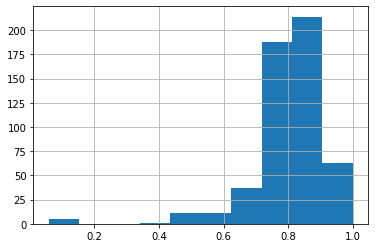

In [ ]:
(pd.Series(y_pred_rand_for).hist())

In [ ]:
data1.to_csv('/work/data1.csv', index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfr = RandomForestRegressor(n_estimators=250, random_state=42)
rfr.fit(X_train, y_train)

y_pred_rand_for = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

print('Test:', math.sqrt(mean_squared_error(y_test, y_pred_rand_for)), r2_score(y_test, y_pred_rand_for))
print('Train:', math.sqrt(mean_squared_error(y_train, y_pred_train)), r2_score(y_train, y_pred_train))

Test: 0.12824192874892806 -0.07600147493063192
Train: 0.04344911030102394 0.8447977955654775


In [ ]:
#xgboost 
!pip install xgboost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(
    n_estimators=250, 
    reg_lambda=10,
    gamma=0,
    max_depth=3,
    objective='reg:squarederror',
    random_state=42
)

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)
y_pred_train = xgb_reg.predict(X_train)

print('Test:', math.sqrt(mean_squared_error(y_test, y_pred_xgb)), r2_score(y_test, y_pred_xgb))
print('Train:', math.sqrt(mean_squared_error(y_train, y_pred_train)), r2_score(y_train, y_pred_train))

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Test: 0.13179121042923334 -0.1363854849735946
Train: 0.07548356528965523 0.5315740789271177


<AxesSubplot:>

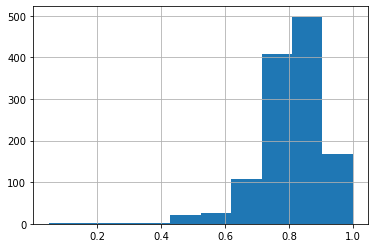

In [ ]:
(pd.Series(y_pred_train).hist())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfr = RandomForestRegressor(n_estimators=250, random_state=42)
rfr.fit(X_train, y_train)

y_pred_rand_for = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

print('Test:', math.sqrt(mean_squared_error(y_test, y_pred_rand_for)), r2_score(y_test, y_pred_rand_for))
print('Train:', math.sqrt(mean_squared_error(y_train, y_pred_train)), r2_score(y_train, y_pred_train))

Test: 6.277245955957676 -0.017411659328566476
Train: 2.3338333765520187 0.8597577379023195


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

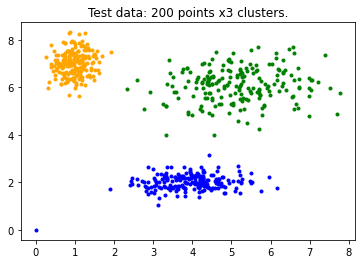

In [ ]:

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

In [ ]:
print(X_train.shape,y_train.shape)


(1232, 15) (1232,)


In [ ]:
X_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 935 to 1141
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   prob_feedback_score                  1232 non-null   float64
 1   accommodates                         1232 non-null   float64
 2   availability_30                      1232 non-null   int64  
 3   bathrooms                            1232 non-null   float64
 4   bedrooms                             1232 non-null   float64
 5   beds                                 1232 non-null   float64
 6   price                                1232 non-null   float64
 7   cancellation_policy_flexible         1232 non-null   uint8  
 8   cancellation_policy_moderate         1232 non-null   uint8  
 9   cancellation_policy_strict           1232 non-null   uint8  
 10  cancellation_policy_super_strict_30  1232 non-null   uint8  
 11  cancellation_policy_super_st

In [ ]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
#alldata = np.vstack((X_train, y_train))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_train, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    print(u)
    cluster_membership = np.argmax(u, axis=0)
    print(cluster_membership)
    for j in range(ncenters):
        print(j)
        ax.plot(X_train[cluster_membership == j],
                #ypts[cluster_membership == j], 
                #'.', 
                color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

[[1.63150320e-05 8.44864625e-05 9.80372428e-04 6.86723458e-06
  7.22207590e-06 1.73125892e-05 1.00000000e+00 3.10010595e-05
  2.88991518e-05 2.14488146e-05 3.40612432e-05 3.41537048e-05
  1.74687313e-05 2.96210799e-05 9.32308464e-05]
 [9.99983685e-01 9.99915514e-01 9.99019628e-01 9.99993133e-01
  9.99992778e-01 9.99982687e-01 6.56386237e-13 9.99968999e-01
  9.99971101e-01 9.99978551e-01 9.99965939e-01 9.99965846e-01
  9.99982531e-01 9.99970379e-01 9.99906769e-01]]
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
0


ValueError: Item wrong length 15 instead of 1232.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e6d3dd7-a3ce-422e-8f25-57163d804f84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>